In this file I start by implementing a compressed sensing reconstruction approach. I want to have a well accepted classical method 
as a baseline for my later deep learning models.

In [2]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"]= '0' #, this way I would choose GPU 3 to do the work

sys.path.append('../scripts')
sys.path.append('../models')

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom # for compressing images / only for testing purposes to speed up NN training
from torch.utils.data import DataLoader, Subset
import torch.optim as optim
import torch.nn as nn
from data_preparation import *
from data_undersampling import *
#from Naive_CNN_3D_Residual import *
from output_statistics import *
import plotly.graph_objects as go

In [3]:
#### keep three middle rows, delete every other row after that next time step the opposite

ground_truth = np.load('Full_Rank_All.npy')

1. Generate mask for spherical k-space

2. Generate mask for undersampling

In [4]:
nx, ny, nz = 22, 22, 21
fixed_radius = 10

fixed_sphere_mask = fully_sampled_mask(fixed_radius,(nx, ny, nz))

sampled_point = np.sum(fixed_sphere_mask)

print("Number of sampled point")
print(sampled_point)


#np.save('Undersampled_Data/combined_undersampled_possoin_3D_fixed_r0_AF_3.npy', NN_input) Careful, due to randomnoess if you save this again
# this will NOT reproduce the exact same pattern as earlier models have been trained on

Number of sampled point
4169


1.868668758404303
1.6810483870967743
1.8487804878048781


3. Undersample

In [ ]:
FT = fourier_transform(ground_truth)
undersampled_FT = FT.copy()

# Dynamically expand mask to match data's trailing dimensions
num_trailing_dims = undersampled_FT.ndim - New_mask.ndim  # Number of trailing dimensions
mask_expanded = New_mask.reshape(New_mask.shape + (1,) * num_trailing_dims)  # Dynamically expand
        
# Apply the mask
undersampled_FT[:,:,:, ...] = undersampled_FT[:,:,:, ...] * mask_expanded

NN_input = inverse_fourier_transform(undersampled_FT)

NN_input = NN_input.astype(np.complex64)

np.save('Undersampled_Data/combined_undersampled_Alternating_AF_3.npy', NN_input)

In [ ]:
test = np.log10(np.abs(undersampled_FT[:,:,14,0,0,0]))


plt.imshow(test)

Visualizing mask

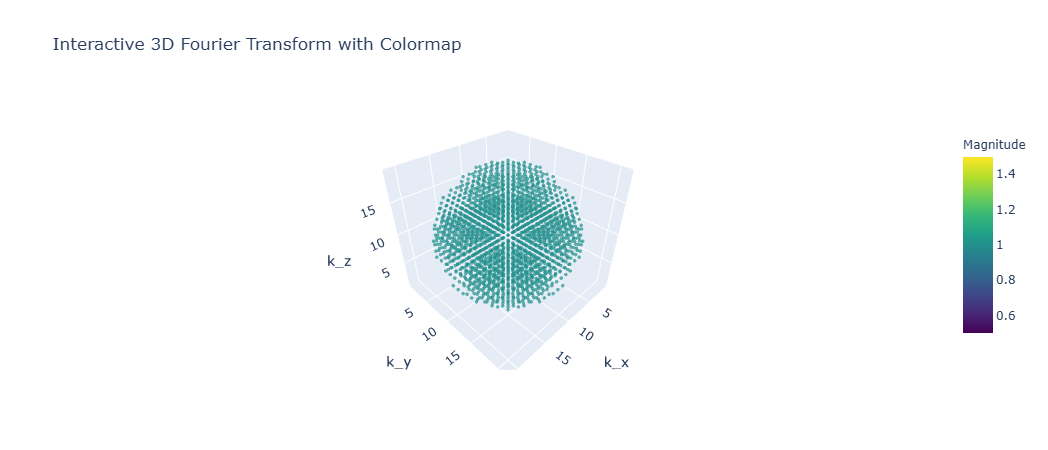

In [15]:
# Suppose 'mask' is your 3D array with 0/1 values.
Mask = New_mask_1


# Get the indices for the full 3D grid
x, y, z = np.indices(New_mask_1.shape)

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
values = New_mask_1.flatten()

# Filter out the 0 values — keep only those indices where values == 1
idx = np.where(values == 1)
x = x[idx]
y = y[idx]
z = z[idx]
values = values[idx]  # This will be all 1's now, but you might still want it for the colormap

# Create the 3D scatter plot
fig = go.Figure(
    data=go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=2,              # Adjust marker size
            color=values,        # All ones, but you can still pass it in if you want a colormap
            colorscale='Viridis',
            colorbar=dict(
                title="Magnitude",
                len=0.8
            ),
            opacity=0.7
        )
    )
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title="k_x",
        yaxis_title="k_y",
        zaxis_title="k_z",
    ),
    title="Interactive 3D Fourier Transform with Colormap"
)

fig.show()